## Convolution

*Convolution*: 
- a simple mathematical function that quantifies similarity between a pattern (a "kernel") such as the red square wave below with data ( blue rectangularish thingy below).
  
![](Convolution_of_spiky_function_with_box2.gif)
  
The convolution (black line) reflects how similar the blue signal is with the kernel at any given time point. Convolution is thus used in all of digital signal processing.

The math is simple. We take the kernel, move it to the first portion of the data by lining it up with the first sample point, then we multiply each element of the kernel with the data, sum the results into one new number and write that to that first sample point.


In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

#### Convolution in signal generation and in fMRI research.

If we want to generate a signal where a certain pattern (the kernel) occurs at certain times, we can use convolution to achieve that. Thus, programs liek SPM use convolution of stimulus timinng info with a lernel that resembles the typical BOLD (fMRI) response as the kernel to generate fake, ideal, fMRI activation for comparison/correlation with the real data:


Text(0.5, 1.0, 'simulated stimulus onsets, every 11 scans')

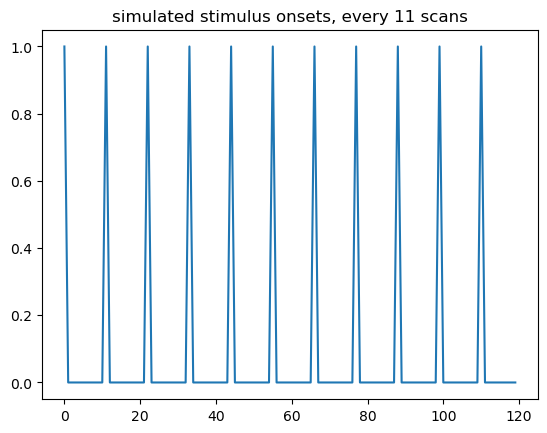

In [2]:
onsets = np.zeros(120)
indx = range(0,120,11)
onsets[indx]= 1
plt.plot(onsets) #, title ('simulated stimulus onsets, every 11 scans')
plt.title('simulated stimulus onsets, every 11 scans')

Make a Kernel 

-   Now we make a kernel.
-   the inverted gamma function is nice because it looks like fMRI in V1
-   let's make one that is 10 scans long


Text(0.5, 1.0, 'an inverted gamma kernel, length 10')

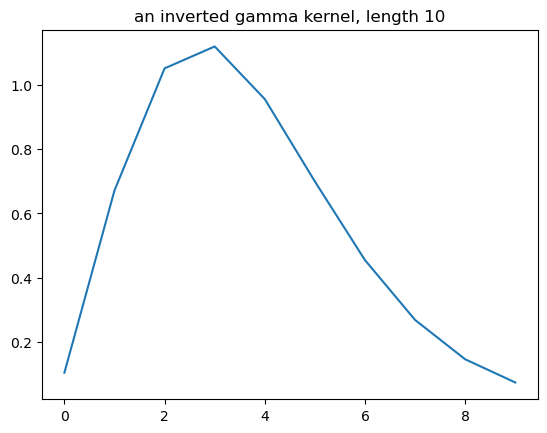

In [3]:
g_f = np.arange(0.1,5.1,0.5)
kernel = [1./math.gamma(i) for i in g_f]
plt.plot(kernel) #, title('an inverted gamma kernel, length 10')
plt.title('an inverted gamma kernel, length 10')

Convolve

Now we just convolve the onsets with the kernel and plot the result


Text(0.5, 1.0, 'an inverted gamma kernel, length 10')

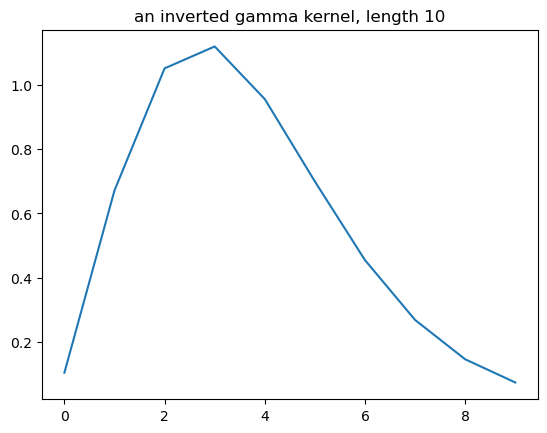

In [4]:
g_f = np.arange(0.1,5,0.5)
kernel = [1./math.gamma(i) for i in g_f]
plt.plot(kernel) #, title('an inverted gamma kernel, length 10')
plt.title('an inverted gamma kernel, length 10')

Longer onsets...  
  
So this basically puts each 10 second kernel at the location where the onset is. There were 11 seconds between onsets, so this is like copy paste, but how about when the kernel is longer than the interval between onsets?


Text(0.5, 1.0, 'onset vector convolved with canonical BOLD response')

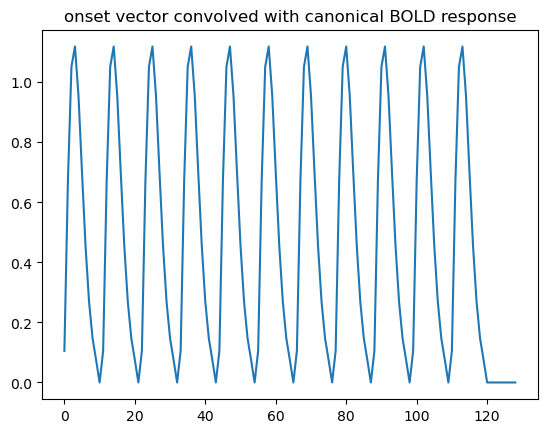

In [5]:
convolution  = np.convolve(onsets, kernel); 

plt.plot(convolution) #, title('onset vector convolved with canonical BOLD response')
plt.title('onset vector convolved with canonical BOLD response')

But...

So this basically puts each 10 second kernel at the location where the onset is. There were 11 seconds between onsets, so this is like copy paste, but how about when the kernel is longer than the interval between onsets?


Text(0.5, 1.0, 'Convolution with temporal summation')

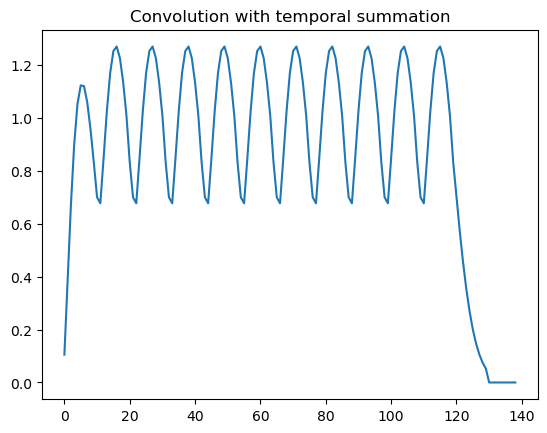

In [6]:
g_f=np.arange(0.1,5.1,0.25)
kernel = [1./math.gamma(i) for i in g_f] # this Kernel is twice as long
convolution  = np.convolve(onsets, kernel); 
#figure
plt.plot(convolution) #, title('Convolution with temporal summation')
plt.title('Convolution with temporal summation')

overlaps

When the convolution encounters overlap, then temporal summation results, because convolution is a process of shifting the kernel, multiplying element-wise, and summation to one new value, rinse and repeat. Because of the shifting and summing up portion of the algorithm, if the Kernel spans multiple, similar events, it will show temporal summation.


even better...

This is more interesting with variable inter-onset times.

(120, 1)


Text(0.5, 1.0, 'simulated stimulus onsets, every 11 scans')

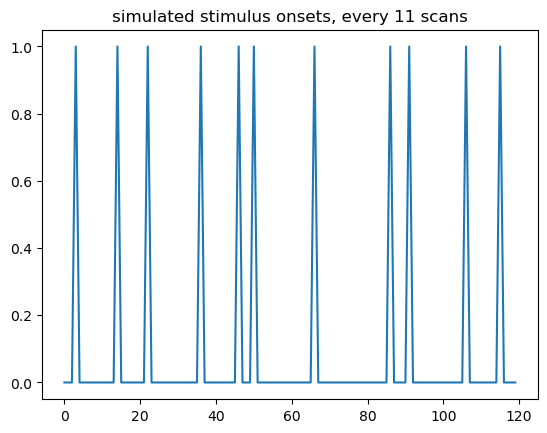

In [7]:
onsets = np.zeros((120,1))

onsets[[3,14,22,36,46,50,66,86,91,106,115],] = 1; #simple case where a stimulus is on every 11 scans
print(onsets.shape)
plt.plot(onsets) #, title ('simulated stimulus onsets, every 11 scans')
plt.title('simulated stimulus onsets, every 11 scans')


Text(0.5, 1.0, 'Convolution of random ITIs')

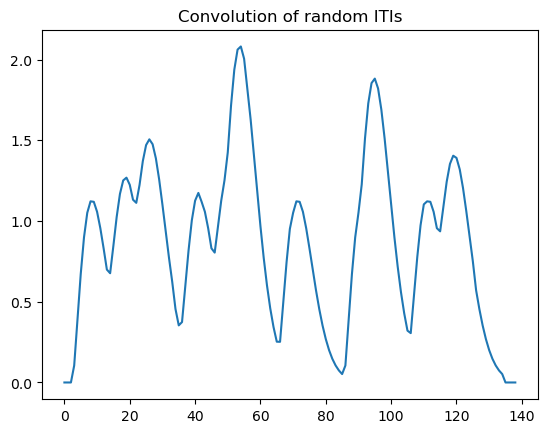

In [8]:
convolution  = np.convolve(onsets.squeeze(), kernel); 
plt.plot(convolution) #, title('Convolution of random ITIs')
plt.title('Convolution of random ITIs')

Now we convolve these onset times with the same kernel

 what happened?

Longer intervals between onsets prompt complete reduction to baseline, temporal proximity prompts smeared, overlapping events. How about gamma-shaped responses to stimuli that are longer than one image?


Text(0.5, 1.0, 'simulated stimulus onsets, every 11 scans')

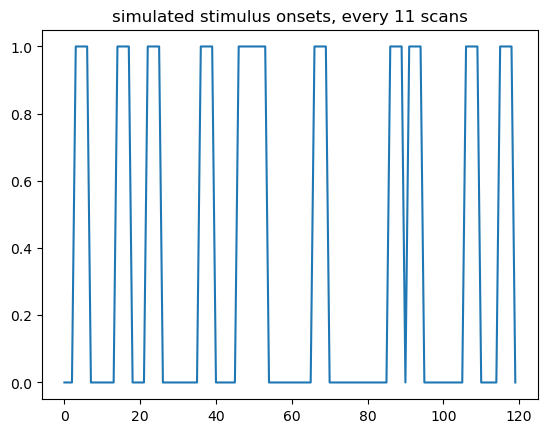

In [9]:
onsets = np.zeros((120,1))
set0=[3,14,22,36,46,50,66,86,91,106,115];
set1=[i+1 for i in set0]
set2=[i+2 for i in set0]
set3=[i+3 for i in set0]
onsets[set0,] = 1; #simple case where a stimulus is on every 11 scans
onsets[set1,] = 1;

onsets[set2,] = 1;#simple case where a stimulus is on every 11 scans
onsets[set3,] = 1;
##onsets[[3, 14, 22, 36, 46, 50, 66, 86, 91, 106, 115]+2,] = 1;
#onsets[[3, 14, 22, 36, 46, 50, 66, 86, 91, 106, 115]+3,] = 1;
plt.plot(onsets) #, title ('simulated stimulus onsets, every 11 scans')
plt.title('simulated stimulus onsets, every 11 scans')

Now we convolve these onset times with the same kernel.


Text(0.5, 1.0, 'Convolution with 4-TR-long events')

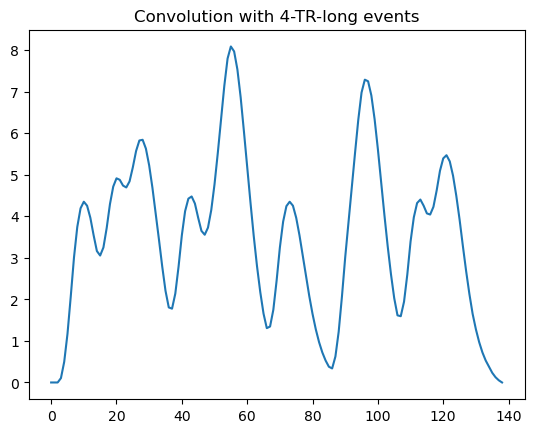

In [10]:
convolution  = np.convolve(onsets.squeeze(), kernel); 
plt.plot(convolution) #, title('Convolution with 4-TR-long events'), ylabel('note the scale')
plt.title('Convolution with 4-TR-long events')

## Deconvolution

And now something completely different

### Deconvolution

Deconvolution is the process where we wish to estimate the Kernel from known data and known event-times. This is a version of the so-called inverse problem , and we solve it with a regression. Let's start with the simulated we we have:


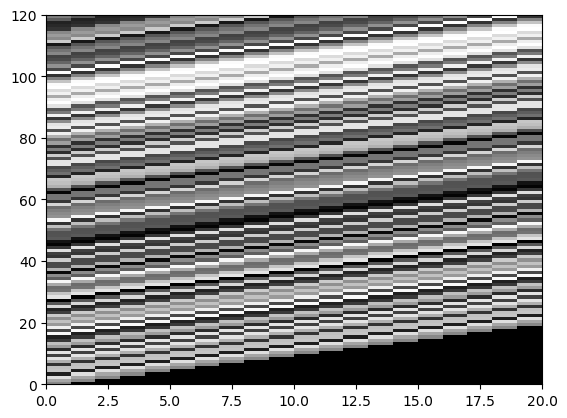

In [11]:
convolution = np.random.rand(200) # Replace with your own convolution array
onsets = np.random.rand(120) # Replace with your own onsets array

X = np.zeros((len(convolution[0:120]), 20))
temp = onsets.copy()

for i in range(20):
    X[:, i] = temp
    temp = np.concatenate(([0], temp[:-1]))

plt.pcolor(X, cmap='gray')
plt.show()

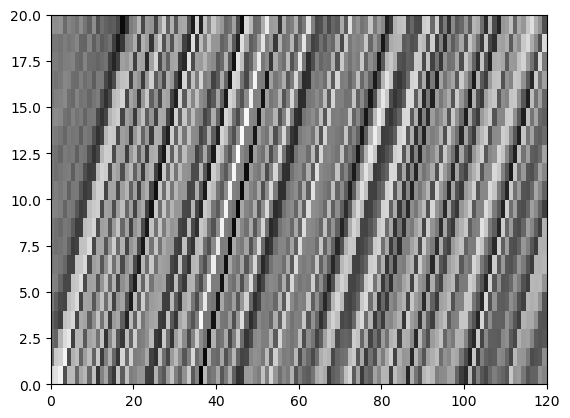

In [12]:

PX = np.linalg.pinv(X)

plt.pcolor(PX, cmap='gray')
plt.show()

h = PX @ convolution[0:120].T


convolution = np.random.rand(200) # Replace with your own convolution array
onsets = [3, 14, 22, 36, 46, 50, 66, 86, 91, 106, 115]